Introduction
This data challenge is the second stage of your interview for the position.
During this stage, we are interested in your approach and ability to develop useful predictions on a real dataset. 
Data
You are provided three data files:
• Training-Data.csv
• Testing-Data.csv
• Submission-Format.csv
Develop your prediction methods using the ‘Training-Data’. The training data contains 15973 observations
and includes the target objective of this exercise (named ‘Target’). When you are ready, generate predictions
for the target objective using the 837 observations found in the ‘Testing-Data’. When you have finished,
format your predictions so that they match the format seen in the ‘Submission-Format’ file. Lastly, write a 1-page summary of the model results (e.g. accuracy, ROC, etc.) with visualizations and explanation of what the results mean for someone using the model.
Description
The training data contains the following values:
• ID = The unique identifier for each observation
• Target = The target objective of this exercise (0/1)
• Cat_A:N = Categorical variable (inputs)
• Continuous = Continuous variable (input)
• Date = Date associated with each observation (input)
• Flag = A binary encoded indicator (input)
• Count_1:3 = Integer count associated the observation (input)





In [65]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Training-Data.csv')

In [3]:
df.head()

,ID,Target,Cat_A,Cat_B,Cat_C,Cat_D,Cat_E,Cat_F,Cat_G,Cat_H,...,Cat_K,Cat_L,Cat_M,Cat_N,Continuous,Date,Flag,Count_1,Count_2,Count_3
0,9bef2d27,0,A36,B4,C08,D10,E088,F31,G08,H13,...,K3,L14,M2,N2,19742544.0,2012-04-23,1.0,1.0,0.0,1.0
1,6acc867c,1,A36,B3,C09,D06,E153,F20,G08,H01,...,K4,L13,M2,N2,2000000.0,2013-04-23,1.0,1.0,0.0,1.0
2,a5898dcc,0,A36,B4,C09,D56,NaN,F46,G08,H13,...,K3,L03,M2,N2,170311000.0,2014-09-10,1.0,8.0,0.0,2.0
3,986cad8a,0,A36,B1,C08,D10,E088,F81,G08,H13,...,K3,L03,M2,N2,120072000.0,2014-04-29,1.0,11.0,4.0,9.0
4,bbe6a824,0,A36,B4,C09,D06,E153,F06,G08,H10,...,K6,L03,M2,N2,328553000.0,2013-01-15,1.0,3.0,0.0,1.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15973 entries, 0 to 15972
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          15973 non-null  object 
 1   Target      15973 non-null  int64  
 2   Cat_A       15755 non-null  object 
 3   Cat_B       5246 non-null   object 
 4   Cat_C       15973 non-null  object 
 5   Cat_D       15973 non-null  object 
 6   Cat_E       14949 non-null  object 
 7   Cat_F       15950 non-null  object 
 8   Cat_G       5257 non-null   object 
 9   Cat_H       15947 non-null  object 
 10  Cat_I       15961 non-null  object 
 11  Cat_J       15958 non-null  object 
 12  Cat_K       15964 non-null  object 
 13  Cat_L       15951 non-null  object 
 14  Cat_M       15973 non-null  object 
 15  Cat_N       15973 non-null  object 
 16  Continuous  14571 non-null  float64
 17  Date        15973 non-null  object 
 18  Flag        5259 non-null   float64
 19  Count_1     15291 non-nul

In [177]:
cat = ['Cat_A', 'Cat_D', 'Cat_E', 'Cat_F', 'Cat_H']
for col in cat:
    print('the value counts for {} is \n, the nuniques is {}, the value_counts is {}'.format(col, df[col].nunique(),df[col].value_counts().count() ), 
          '\n',df[col].value_counts())

the value counts for Cat_A is 
, the nuniques is 44, the value_counts is 44 
 A27    2184
A26    1742
A22    1599
A42     982
A43     922
A10     665
A13     641
A12     623
A02     618
A35     604
A05     578
A39     568
A01     514
A44     387
A28     352
A30     277
A07     260
A23     235
A03     220
A25     219
A19     187
A37     182
A36     170
A33     149
A14     121
A17     118
A20     114
A04      88
A09      87
A31      83
A41      60
A21      48
A08      46
A34      37
A06      24
A11      23
A29      16
A38       3
A16       2
A32       2
A24       2
A15       1
A18       1
A40       1
Name: Cat_A, dtype: int64
the value counts for Cat_D is 
, the nuniques is 68, the value_counts is 68 
 D23    2113
D17    1467
D14    1155
D18    1069
D21     977
       ... 
D60       2
D37       2
D08       2
D64       1
D39       1
Name: Cat_D, Length: 68, dtype: int64
the value counts for Cat_E is 
, the nuniques is 198, the value_counts is 198 
 E162    1701
E096     814
E073     801
E

In [75]:
(df['Continuous'].quantile(0.9))

58500320.0

In [74]:
df['Continuous'].median()

2913228.0

C:\Users\14029\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Continuous'>

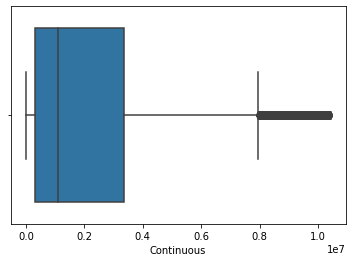

In [78]:
sns.boxplot(df[df['Continuous']<df['Continuous'].quantile(0.7)]['Continuous'])

In [93]:
df[(df['Continuous'] <= Q1 - 1.5*IQR)].shape[0]

0

C:\Users\14029\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Continuous'>

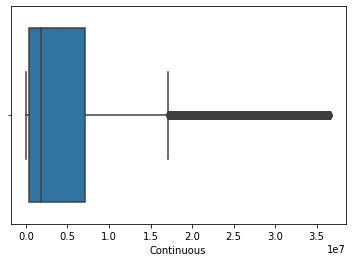

In [89]:
sns.boxplot(df[(df['Continuous']>= Q1 - 1.5*IQR) & (df['Continuous']<= Q3 + 1.5*IQR)]['Continuous'])

In [ ]:
format(integervalue, '05d')
f'{s:>5}

In [141]:
for col in df.columns :
    print( 'The missing value in colomn {} is {},  the percentage is {}%'.format(col, format(df[col].isnull().sum(), '05d'),
                                                                                    round((df[col].isnull().sum()/df.shape[0]*100),2))) 

The missing value in colomn ID is 00000,  the percentage is 0.0%
The missing value in colomn Target is 00000,  the percentage is 0.0%
The missing value in colomn Cat_A is 00218,  the percentage is 1.36%
The missing value in colomn Cat_B is 10727,  the percentage is 67.16%
The missing value in colomn Cat_C is 00000,  the percentage is 0.0%
The missing value in colomn Cat_D is 00000,  the percentage is 0.0%
The missing value in colomn Cat_E is 01024,  the percentage is 6.41%
The missing value in colomn Cat_F is 00023,  the percentage is 0.14%
The missing value in colomn Cat_G is 10716,  the percentage is 67.09%
The missing value in colomn Cat_H is 00026,  the percentage is 0.16%
The missing value in colomn Cat_I is 00012,  the percentage is 0.08%
The missing value in colomn Cat_J is 00015,  the percentage is 0.09%
The missing value in colomn Cat_K is 00009,  the percentage is 0.06%
The missing value in colomn Cat_L is 00022,  the percentage is 0.14%
The missing value in colomn Cat_M is 0

In [156]:
df[df.Cat_A.isnull()].Cat_E .isnull().sum() - df.Cat_A.isnull().sum()

-218

In [142]:
df.columns

Index(['ID', 'Target', 'Cat_A', 'Cat_B', 'Cat_C', 'Cat_D', 'Cat_E', 'Cat_F',
       'Cat_G', 'Cat_H', 'Cat_I', 'Cat_J', 'Cat_K', 'Cat_L', 'Cat_M', 'Cat_N',
       'Continuous', 'Date', 'Flag', 'Count_1', 'Count_2', 'Count_3'],
      dtype='object')

In [146]:
to_drop = ["ID", 'Cat_B', 'Cat_G', 'Flag', 'Count_2', 'Count_3' ]
df_processed = df.drop(to_drop, axis = 1)
df_processed.head()

,Target,Cat_A,Cat_C,Cat_D,Cat_E,Cat_F,Cat_H,Cat_I,Cat_J,Cat_K,Cat_L,Cat_M,Cat_N,Continuous,Date,Count_1
0,0,A36,C08,D10,E088,F31,H13,I1,J3,K3,L14,M2,N2,19742544.0,2012-04-23,1.0
1,1,A36,C09,D06,E153,F20,H01,I1,J3,K4,L13,M2,N2,2000000.0,2013-04-23,1.0
2,0,A36,C09,D56,NaN,F46,H13,I2,J1,K3,L03,M2,N2,170311000.0,2014-09-10,8.0
3,0,A36,C08,D10,E088,F81,H13,I2,J3,K3,L03,M2,N2,120072000.0,2014-04-29,11.0
4,0,A36,C09,D06,E153,F06,H10,I2,J3,K6,L03,M2,N2,328553000.0,2013-01-15,3.0


In [163]:
df_processed.isnull().sum()

Target           0
Cat_A          218
Cat_C            0
Cat_D            0
Cat_E         1024
Cat_F           23
Cat_H           26
Cat_I           12
Cat_J           15
Cat_K            9
Cat_L           22
Cat_M            0
Cat_N            0
Continuous    1402
Date             0
Count_1        682
dtype: int64

In [174]:
df_processed[df_processed.Continuous.isnull()]

,Target,Cat_A,Cat_C,Cat_D,Cat_E,Cat_F,Cat_H,Cat_I,Cat_J,Cat_K,Cat_L,Cat_M,Cat_N,Continuous,Date,Count_1
2536,1,A10,C01,D53,E054,F45,H13,I2,J4,K3,L14,M1,N4,NaN,2013-11-18,1.0
2537,1,A01,C06,D38,E057,F70,H13,I1,J4,K1,L07,M1,N1,NaN,2012-11-30,1.0
2538,1,A14,C06,D14,E096,F11,H13,I1,J4,K1,L01,M1,N1,NaN,2014-08-22,NaN
2539,1,A31,C01,D53,E054,F73,H10,I1,J4,K3,L14,M1,N4,NaN,2014-08-22,NaN
2540,1,A44,C12,D22,E150,F80,H13,I1,J4,K1,L01,M1,N2,NaN,2014-08-26,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,1,A26,C05,D51,E159,F74,H14,I5,J4,K6,L02,M1,N3,NaN,2013-12-10,8.0
15968,1,A21,C06,D14,E006,F64,H10,I1,J4,K1,L14,M1,N1,NaN,2013-11-11,1.0
15969,1,A10,C05,D18,E076,F45,H13,I2,J4,K3,L14,M1,N3,NaN,2013-08-27,1.0
15970,1,A19,C09,D06,E153,F10,H13,I5,J4,K3,L14,M1,N2,NaN,2014-03-06,NaN


In [175]:
 df_processed[df_processed.Continuous.isnull()].Count_1.isnull().sum()

539

In [176]:
# when cat_A is null, continue is null
print('When cat_A is null, amount {}, the null of continuous is {}'
      .format(df_processed.Cat_A.isnull().sum(),  df_processed[df_processed.Cat_A.isnull()].Continuous.isnull().sum()))

print('When cat_A is null, amount {}, the null of Cat_E is {}'
      .format(df_processed.Cat_A.isnull().sum(),  df_processed[df_processed.Cat_A.isnull()].Cat_E.isnull().sum()))

print('When cat_A is null, amount {}, the null of Count_1 is {}'
      .format(df_processed.Cat_A.isnull().sum(),  df_processed[df_processed.Cat_A.isnull()].Count_1.isnull().sum()))

print('When Continuous is null, amount {}, the null of Count_1 is {}'
      .format(df_processed.Continuous.isnull().sum(),  df_processed[df_processed.Continuous.isnull()].Count_1.isnull().sum()))


When cat_A is null, amount 218, the null of continuous is 218
When cat_A is null, amount 218, the null of Cat_E is 0
When cat_A is null, amount 218, the null of Count_1 is 40
When Continuous is null, amount 1402, the null of Count_1 is 539


In [ ]:
df_processed[df_processed.Cat_A.isnull()].Continuous.isnull().count()

In [34]:
# When check the rows of null value in Cat_B, The Cat_G is also Null. Since the Null value for Cat_B and Cat_G are highly
# correlated with each other and there null value are too large () in the for the total amount of data, I simply delete both 
#of the columns. 

df[df['Cat_B'].isnull()].Count_3.isnull().sum()

10714

In [33]:
df[df['Flag'].isnull()].Count_3.isnull().sum()

10714

In [22]:
df['Target'].value_counts(normalize=True)

0    0.646904
1    0.353096
Name: Target, dtype: float64

<AxesSubplot:>

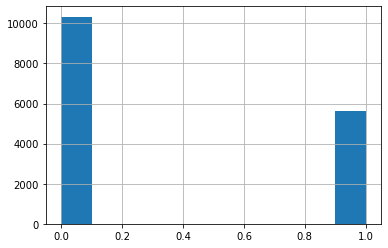

In [21]:
df['Target'].hist()

In [35]:
df.Flag.value_counts()

1.0    3949
0.0    1310
Name: Flag, dtype: int64

In [24]:
test_df = pd.read_csv('Testing-Data.csv')
test_df.head()

,ID,Cat_A,Cat_B,Cat_C,Cat_D,Cat_E,Cat_F,Cat_G,Cat_H,Cat_I,...,Cat_K,Cat_L,Cat_M,Cat_N,Continuous,Date,Flag,Count_1,Count_2,Count_3
0,9c996913,A36,B1,C09,D06,E153,F16,G02,H13,I2,...,K3,L14,M2,N2,171415000.0,2016-04-26,1,5,0,1
1,65cf074d,A05,B4,C12,D17,NaN,F67,G08,H10,I2,...,K6,L14,M2,N2,125500000.0,2016-06-30,1,8,0,1
2,d4f9fb46,A12,B4,C12,D21,E037,F67,G08,H13,I2,...,K3,L14,M2,N2,342953498.0,2016-08-17,1,6,7,35
3,b70e0902,A05,B4,C12,D21,E037,F67,G08,H13,I2,...,K3,L14,M2,N2,110951000.0,2016-12-06,1,7,7,39
4,01f71ee5,A05,B4,C12,D23,E162,F82,G08,H13,I2,...,K3,L07,M2,N2,20203075.0,2016-12-13,1,7,0,8


In [25]:
test_df.nunique()

ID            837
Cat_A          29
Cat_B           4
Cat_C          10
Cat_D          48
Cat_E          97
Cat_F          51
Cat_G           5
Cat_H          10
Cat_I           5
Cat_J           3
Cat_K           6
Cat_L          13
Cat_M           1
Cat_N           4
Continuous    801
Date          253
Flag            2
Count_1        18
Count_2        38
Count_3       100
dtype: int64

In [26]:
test_df.isnull().sum()

ID              0
Cat_A           0
Cat_B           2
Cat_C           0
Cat_D           0
Cat_E         115
Cat_F          19
Cat_G          14
Cat_H           1
Cat_I           1
Cat_J           3
Cat_K           2
Cat_L           1
Cat_M           0
Cat_N           0
Continuous      0
Date            0
Flag            0
Count_1         0
Count_2         0
Count_3         0
dtype: int64

In [37]:
test_df[test_df.Cat_E.isnull()]

,ID,Cat_A,Cat_B,Cat_C,Cat_D,Cat_E,Cat_F,Cat_G,Cat_H,Cat_I,...,Cat_K,Cat_L,Cat_M,Cat_N,Continuous,Date,Flag,Count_1,Count_2,Count_3
1,65cf074d,A05,B4,C12,D17,NaN,F67,G08,H10,I2,...,K6,L14,M2,N2,125500000.0,2016-06-30,1,8,0,1
5,094e357d,A12,B4,C12,D17,NaN,F62,G08,H12,I2,...,K6,L14,M2,N2,1.0,2016-10-03,1,35,0,1
7,a9976cea,A05,B4,C12,D23,NaN,F65,G08,H10,I2,...,K3,L14,M2,N2,49113000.0,2016-04-26,1,3,2,17
32,40e498b3,A23,B4,C11,D33,NaN,F05,G08,H13,I2,...,K4,L14,M2,N1,1539000.0,2016-04-15,1,2,12,67
57,0558201d,A22,B4,C09,D56,NaN,F80,G08,H13,I1,...,K3,L07,M2,N2,279000.0,2016-03-04,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,b33a0b15,A22,B1,C12,D23,NaN,F10,G08,H13,I2,...,K3,L07,M2,N2,805300.0,2016-08-26,1,3,0,2
821,48efe6c7,A26,B4,C05,D48,NaN,F40,G08,H13,I5,...,K4,L14,M2,N3,1156449.0,2016-08-26,1,1,76,102
822,cd5a3f88,A05,B1,C12,D23,NaN,F67,G08,H13,I2,...,K3,L14,M2,N2,35429886.0,2017-01-11,1,4,1,5
823,2e1572e1,A25,B4,C02,D03,NaN,F60,G02,H09,I3,...,K4,L04,M2,N4,2460000.0,2016-11-15,1,1,0,1


In [133]:
cats = ['Cat_A', 'Cat_B', 'Cat_C', 'Cat_D', 'Cat_E', 'Cat_F',
       'Cat_G', 'Cat_H', 'Cat_I', 'Cat_J', 'Cat_K', 'Cat_L', 'Cat_M', 'Cat_N',
        'Date']
for col in cats:
    if  any(x in df['Cat_A'].value_counts().index for x in test_df['Cat_A'].value_counts().index):
        print (col)

Cat_A
Cat_B
Cat_C
Cat_D
Cat_E
Cat_F
Cat_G
Cat_H
Cat_I
Cat_J
Cat_K
Cat_L
Cat_M
Cat_N
Date
